<h2>Estudo - Séries temporais</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use("seaborn-whitegrid")

C:\Users\Pichau\AppData\Local\Temp\ipykernel_9796\1138981715.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
sales = pd.read_csv('train.csv', index_col='date', parse_dates=['date'])

<h3>1. Regressão linear no tempo e dependência temporal da variável resposta</h3>

In [3]:
book_sales = sales[sales['family'] == 'BOOKS'] #Filtrando apenas livros
book_sales.index = book_sales.index.to_period("D") #Cobsiderando o index pelo dia
book_sales = book_sales.groupby(book_sales.index).sum() #Agraupand os valores de venda por dia
book_sales = book_sales.drop(['id', 'store_nbr'], axis=1)
book_sales['time'] = np.arange(len(book_sales.index)) #Cria uma nova coluna 'time', com a marcação do tempoem em ordem cronológica: 1, 2, 3, 4, etc.
book_sales['lag_1'] = book_sales['sales'].shift(1) # Cria um lag temporal de 1 período, nesse caso, 1 dia
book_sales.reindex(columns=['sales', 'lag_1'])


C:\Users\Pichau\AppData\Local\Temp\ipykernel_9796\471560871.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  book_sales = book_sales.groupby(book_sales.index).sum() #Agraupand os valores de venda por dia


,sales,lag_1
date,,
2013-01-01,0.0,NaN
2013-01-02,0.0,0.0
2013-01-03,0.0,0.0
2013-01-04,0.0,0.0
2013-01-05,0.0,0.0
...,...,...
2017-08-11,0.0,0.0
2017-08-12,0.0,0.0
2017-08-13,1.0,0.0


In [4]:
index = book_sales.time[book_sales['sales'] > 0][0] #Os valores de venda são 0 até o tempo 1373
book_sales = book_sales.iloc[index:, :]


Text(0.5, 1.0, 'Relação entre as vendas de um dia e as vendas do dia anterior')

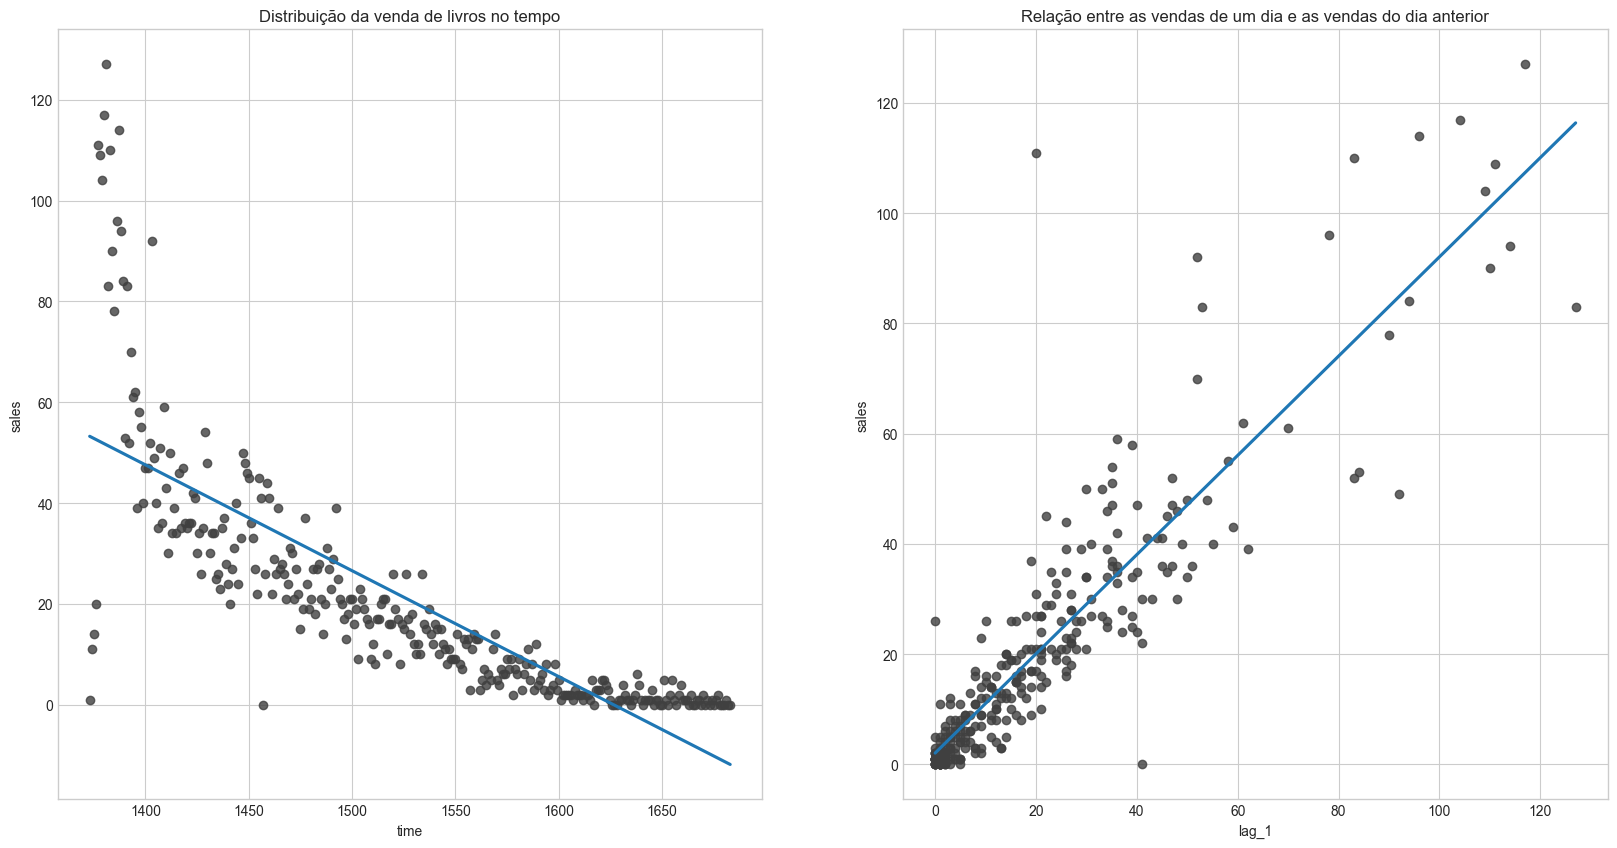

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
#ax.plot('time', 'sales', data=book_sales, color='0.75')
ax1 = sns.regplot(x='time', y='sales', data=book_sales, ci=None, scatter_kws=dict(color='0.25'), ax=ax[0])
ax2 = sns.regplot(x='lag_1', y='sales', data=book_sales, ci=None, scatter_kws=dict(color='0.25'), ax=ax[1])

ax1.set_title('Distribuição da venda de livros no tempo')
ax2.set_title('Relação entre as vendas de um dia e as vendas do dia anterior')

<h3>2. Checando a tendência</h3>

<h4>2.1 - Verificando a média móvel</h4>

<AxesSubplot: xlabel='date'>

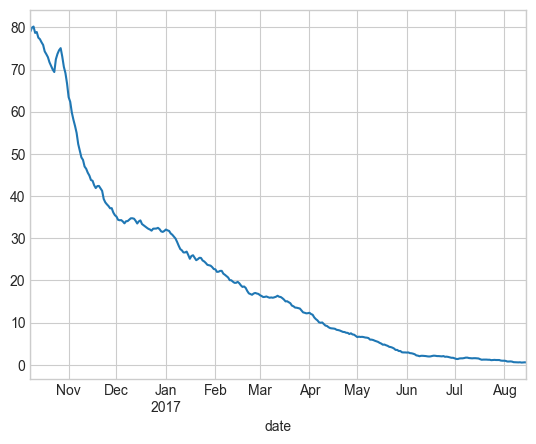

In [6]:
moving_average = book_sales.rolling(window=30, center=True, min_periods=15).mean() 
moving_average['sales'].plot()

<h4>2.2 - Tendência através da regressão linear</h4>

In [10]:
v_resposta = 'sales'

y = book_sales[v_resposta]
X = book_sales.drop(v_resposta, axis=1)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

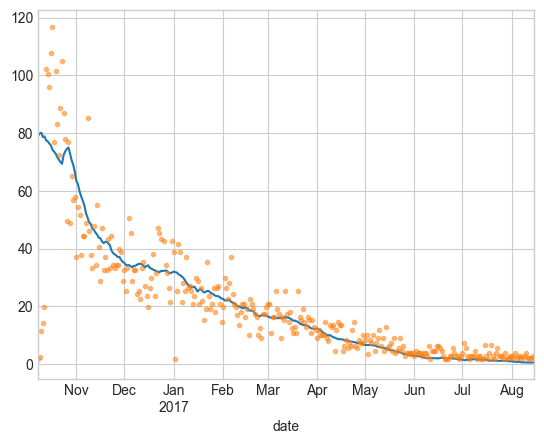

In [22]:
ax = moving_average['sales'].plot()
_ = y_pred.plot(linewidth=1, style='.', alpha=0.5)